# Single Training

## Optimized Hyperparameters

| hyperparameter|FP|AIT|FLVL|FLVU|HCOM|ESOL|
|--------------:|-:|--:|---:|---:|---:|---:|
| hidden_size | 64 | 128 | 256 | 512 | 256 | 256 |
| dropout | 0.279 | 0.298 | 0.238 | 0.268 | 0.276 | 0.201 |
| num_layers | 3 | 3 | 4 | 6 | 7 | 4 |
| num_timesteps | 5 | 8 | 5 | 6 | 4 | 8 |
| lr_init | 0.01 | 0.001 | 0.0001 | 0.0001 | 0.0001 | 0.001 |
| gamma | 0.978 | 0.982 | 0.979 | 0.979 | 0.986 | 0.981 |
| weight_decay | 3.82 $\times$ 10$^{-3}$ | 2.37 $\times$ 10$^{-4}$ | 1.39 $\times$ 10$^{-2}$ | 6.36 $\times$ 10$^{-2}$ | 6.72 $\times$ 10$^{-3}$ | 4.54 $\times$ 10$^{-4}$ |

## Optimized Hyperparameters - Toxicity

| hyperparameter|MOUSE_INTRAPERITONEAL_LDLo|IGC50|LC50|
|--------------:|-------------------------:|----:|---:|
| hidden_size |256|512|64|
| dropout |0.254|0.265|0.326|
| num_layers | 8 | 7 |4|
| num_timesteps | 9 | 9 |2|
| lr_init | 0.001 | 0.001 |0.01|
| gamma | 0.978 | 0.987 |0.982|
| weight_decay | 1.00 $\times$ 10$^{-2}$ | 2.73 $\times$ 10^${-2}$ | 7.41 $\times$ 10^${-4}$|

In [1]:
optimized = {
    'FP' : {'hidden_size' : 64, 'dropout' : 0.279, 'num_layers' : 3, 'num_timesteps' : 5, 'lr_init' : 0.01, 'gamma' : 0.978, 'weight_decay' : 3.82E-3},
    'AIT' : {'hidden_size' : 128, 'dropout' : 0.298, 'num_layers' : 3, 'num_timesteps' : 8, 'lr_init' : 0.001, 'gamma' : 0.982, 'weight_decay' : 2.37E-4},
    'HCOM' : {'hidden_size' : 256, 'dropout' : 0.276, 'num_layers' : 7, 'num_timesteps' : 4, 'lr_init' : 0.0001, 'gamma' : 0.986, 'weight_decay' : 6.72E-3},
    'FLVL' : {'hidden_size' : 256, 'dropout' : 0.238, 'num_layers' : 4, 'num_timesteps' : 5, 'lr_init' : 0.0001, 'gamma' : 0.979, 'weight_decay' : 1.39E-2},
    'FLVU' : {'hidden_size' : 512, 'dropout' : 0.268, 'num_layers' : 6, 'num_timesteps' : 6, 'lr_init' : 0.0001, 'gamma' : 0.979, 'weight_decay' : 6.36E-3},
    'ESOL' : {'hidden_size' : 256, 'dropout' : 0.201, 'num_layers' : 4, 'num_timesteps' : 8, 'lr_init' : 0.001, 'gamma' : 0.981, 'weight_decay' : 4.54E-4},
    
    'MOUSE_INTRAPERITONEAL_LDLo' : {'hidden_size' : 256, 'dropout' : 0.254, 'num_layers' : 8, 'num_timesteps' : 9, 'lr_init' : 0.001, 'gamma' : 0.978, 'weight_decay' : 1.00E-2},
    'RAT_INTRAPERITONEAL_LD50' : {'hidden_size' : 256, 'dropout' : 0.254, 'num_layers' : 8, 'num_timesteps' : 9, 'lr_init' : 0.001, 'gamma' : 0.978, 'weight_decay' : 1.00E-2},
    'IGC50' : {'hidden_size' : 512, 'dropout' : 0.265, 'num_layers' : 7, 'num_timesteps' : 9, 'lr_init' : 0.001, 'gamma' : 0.987, 'weight_decay' : 2.73E-2},
    'LC50' : {'hidden_size' : 64, 'dropout' : 0.326, 'num_layers' : 4, 'num_timesteps' : 2, 'lr_init' : 0.01, 'gamma' : 0.982, 'weight_decay' : 7.41E-4},
}

## Hyperparameter Setting

In [2]:
parameters = dict(
    subfrag_size = 12,
    edge_size = 3,
    out_size = 1,
    seed = 42,
    batch_size = 128,
    max_epoch = 200,
    verbose = True,
    save = True,
    
    target = 'ESOL',
)
parameters = parameters | optimized[parameters['target']]
DATAPATH = "/SSD2/bgkang/Chemomile"

## Dataset

In [3]:
import sys
sys.path.append(DATAPATH)
from src.data import Dataset

dataset = Dataset(
    target = parameters['target'],
    seed = parameters['seed'],
    batch_size = parameters['batch_size'],
    verbose = parameters['verbose'],
    root = DATAPATH
)

	DataDump found for 'ESOL'. Loading dumped data.
Training : 902 | Validation : 113 | Test : 113
Total : 1128


## Model Define

In [4]:
from src.model import Chemomile

model = Chemomile(
    subfrag_size = parameters['subfrag_size'],
    hidden_size = parameters['hidden_size'],
    edge_size = parameters['edge_size'],
    out_size = parameters['out_size'],
    dropout = parameters['dropout'],
    num_layers = parameters['num_layers'],
    num_timesteps = parameters['num_timesteps'],
)

In [5]:
from src.train import Training

train = Training(
    model = model,
    parameters = parameters,
    dataset = dataset,
    root = "/SSD2/bgkang/Chemomile/Model",
)

## Training

In [6]:
train.run()

Output()

| Epoch :    0 | Trn. Loss : 1.125e+00 | Val. Loss : 2.119e+00 | LR : 1.000e-03 |

Saving the best model with valLoss : 2.119

| Epoch :    1 | Trn. Loss : 9.033e-01 | Val. Loss : 8.297e-01 | LR : 9.810e-04 |

Saving the best model with valLoss : 0.830

| Epoch :    2 | Trn. Loss : 8.110e-01 | Val. Loss : 1.258e+00 | LR : 9.624e-04 |

| Epoch :    3 | Trn. Loss : 6.684e-01 | Val. Loss : 5.376e-01 | LR : 9.441e-04 |

Saving the best model with valLoss : 0.538

| Epoch :    4 | Trn. Loss : 6.525e-01 | Val. Loss : 7.047e-01 | LR : 9.261e-04 |

| Epoch :    5 | Trn. Loss : 5.177e-01 | Val. Loss : 6.011e-01 | LR : 9.085e-04 |

| Epoch :    6 | Trn. Loss : 5.134e-01 | Val. Loss : 3.027e-01 | LR : 8.913e-04 |

Saving the best model with valLoss : 0.303

| Epoch :    7 | Trn. Loss : 4.267e-01 | Val. Loss : 2.436e-01 | LR : 8.743e-04 |

Saving the best model with valLoss : 0.244

| Epoch :    8 | Trn. Loss : 3.787e-01 | Val. Loss : 2.126e-01 | LR : 8.577e-04 |

Saving the best model with valLoss : 0.213

| Epoch :    9 | Trn. Loss : 3.541e-01 | Val. Loss : 2.394e-01 | LR : 8.414e-04 |

| Epoch :   10 | Trn. Loss : 3.385e-01 | Val. Loss : 1.845e-01 | LR : 8.254e-04 |

Saving the best model with valLoss : 0.184

| Epoch :   11 | Trn. Loss : 3.226e-01 | Val. Loss : 1.896e-01 | LR : 8.098e-04 |

| Epoch :   12 | Trn. Loss : 2.957e-01 | Val. Loss : 2.040e-01 | LR : 7.944e-04 |

| Epoch :   13 | Trn. Loss : 2.856e-01 | Val. Loss : 2.131e-01 | LR : 7.793e-04 |

| Epoch :   14 | Trn. Loss : 2.654e-01 | Val. Loss : 2.818e-01 | LR : 7.645e-04 |

| Epoch :   15 | Trn. Loss : 2.680e-01 | Val. Loss : 5.425e-01 | LR : 7.500e-04 |

| Epoch :   16 | Trn. Loss : 2.522e-01 | Val. Loss : 4.026e-01 | LR : 7.357e-04 |

| Epoch :   17 | Trn. Loss : 2.621e-01 | Val. Loss : 1.866e-01 | LR : 7.217e-04 |

| Epoch :   18 | Trn. Loss : 2.025e-01 | Val. Loss : 2.204e-01 | LR : 7.080e-04 |

| Epoch :   19 | Trn. Loss : 1.975e-01 | Val. Loss : 1.961e-01 | LR : 6.946e-04 |

| Epoch :   20 | Trn. Loss : 1.863e-01 | Val. Loss : 1.863e-01 | LR : 6.814e-04 |

| Epoch :   21 | Trn. Loss : 1.875e-01 | Val. Loss : 2.201e-01 | LR : 6.684e-04 |

| Epoch :   22 | Trn. Loss : 1.871e-01 | Val. Loss : 2.212e-01 | LR : 6.557e-04 |

| Epoch :   23 | Trn. Loss : 1.739e-01 | Val. Loss : 1.676e-01 | LR : 6.433e-04 |

Saving the best model with valLoss : 0.168

| Epoch :   24 | Trn. Loss : 1.682e-01 | Val. Loss : 1.770e-01 | LR : 6.310e-04 |

| Epoch :   25 | Trn. Loss : 1.648e-01 | Val. Loss : 1.321e-01 | LR : 6.190e-04 |

Saving the best model with valLoss : 0.132

| Epoch :   26 | Trn. Loss : 1.712e-01 | Val. Loss : 1.243e-01 | LR : 6.073e-04 |

Saving the best model with valLoss : 0.124

| Epoch :   27 | Trn. Loss : 1.731e-01 | Val. Loss : 3.133e-01 | LR : 5.957e-04 |

| Epoch :   28 | Trn. Loss : 1.580e-01 | Val. Loss : 1.395e-01 | LR : 5.844e-04 |

| Epoch :   29 | Trn. Loss : 1.567e-01 | Val. Loss : 1.047e-01 | LR : 5.733e-04 |

Saving the best model with valLoss : 0.105

| Epoch :   30 | Trn. Loss : 1.410e-01 | Val. Loss : 9.680e-02 | LR : 5.624e-04 |

Saving the best model with valLoss : 0.097

| Epoch :   31 | Trn. Loss : 1.526e-01 | Val. Loss : 1.014e-01 | LR : 5.517e-04 |

| Epoch :   32 | Trn. Loss : 1.206e-01 | Val. Loss : 1.190e-01 | LR : 5.413e-04 |

| Epoch :   33 | Trn. Loss : 1.115e-01 | Val. Loss : 1.016e-01 | LR : 5.310e-04 |

| Epoch :   34 | Trn. Loss : 1.275e-01 | Val. Loss : 2.452e-01 | LR : 5.209e-04 |

| Epoch :   35 | Trn. Loss : 1.333e-01 | Val. Loss : 1.224e-01 | LR : 5.110e-04 |

| Epoch :   36 | Trn. Loss : 1.057e-01 | Val. Loss : 1.251e-01 | LR : 5.013e-04 |

| Epoch :   37 | Trn. Loss : 1.022e-01 | Val. Loss : 8.969e-02 | LR : 4.918e-04 |

Saving the best model with valLoss : 0.090

| Epoch :   38 | Trn. Loss : 1.014e-01 | Val. Loss : 8.077e-02 | LR : 4.824e-04 |

Saving the best model with valLoss : 0.081

| Epoch :   39 | Trn. Loss : 9.847e-02 | Val. Loss : 9.448e-02 | LR : 4.733e-04 |

| Epoch :   40 | Trn. Loss : 1.034e-01 | Val. Loss : 8.753e-02 | LR : 4.643e-04 |

| Epoch :   41 | Trn. Loss : 9.037e-02 | Val. Loss : 2.033e-01 | LR : 4.554e-04 |

| Epoch :   42 | Trn. Loss : 1.035e-01 | Val. Loss : 1.320e-01 | LR : 4.468e-04 |

| Epoch :   43 | Trn. Loss : 9.775e-02 | Val. Loss : 1.382e-01 | LR : 4.383e-04 |

| Epoch :   44 | Trn. Loss : 1.006e-01 | Val. Loss : 8.900e-02 | LR : 4.300e-04 |

| Epoch :   45 | Trn. Loss : 9.548e-02 | Val. Loss : 8.344e-02 | LR : 4.218e-04 |

| Epoch :   46 | Trn. Loss : 8.675e-02 | Val. Loss : 7.544e-02 | LR : 4.138e-04 |

Saving the best model with valLoss : 0.075

| Epoch :   47 | Trn. Loss : 1.031e-01 | Val. Loss : 9.313e-02 | LR : 4.059e-04 |

| Epoch :   48 | Trn. Loss : 9.111e-02 | Val. Loss : 7.647e-02 | LR : 3.982e-04 |

| Epoch :   49 | Trn. Loss : 9.421e-02 | Val. Loss : 7.319e-02 | LR : 3.906e-04 |

Saving the best model with valLoss : 0.073

| Epoch :   50 | Trn. Loss : 9.659e-02 | Val. Loss : 1.813e-01 | LR : 3.832e-04 |

| Epoch :   51 | Trn. Loss : 8.818e-02 | Val. Loss : 1.044e-01 | LR : 3.759e-04 |

| Epoch :   52 | Trn. Loss : 8.148e-02 | Val. Loss : 9.850e-02 | LR : 3.688e-04 |

| Epoch :   53 | Trn. Loss : 9.299e-02 | Val. Loss : 7.290e-02 | LR : 3.618e-04 |

| Epoch :   54 | Trn. Loss : 7.855e-02 | Val. Loss : 6.760e-02 | LR : 3.549e-04 |

Saving the best model with valLoss : 0.068

| Epoch :   55 | Trn. Loss : 7.413e-02 | Val. Loss : 7.699e-02 | LR : 3.482e-04 |

| Epoch :   56 | Trn. Loss : 7.407e-02 | Val. Loss : 6.525e-02 | LR : 3.416e-04 |

Saving the best model with valLoss : 0.065

| Epoch :   57 | Trn. Loss : 7.904e-02 | Val. Loss : 1.038e-01 | LR : 3.351e-04 |

| Epoch :   58 | Trn. Loss : 8.257e-02 | Val. Loss : 6.120e-02 | LR : 3.287e-04 |

Saving the best model with valLoss : 0.061

| Epoch :   59 | Trn. Loss : 7.392e-02 | Val. Loss : 7.668e-02 | LR : 3.225e-04 |

| Epoch :   60 | Trn. Loss : 7.526e-02 | Val. Loss : 6.249e-02 | LR : 3.163e-04 |

| Epoch :   61 | Trn. Loss : 7.040e-02 | Val. Loss : 6.875e-02 | LR : 3.103e-04 |

| Epoch :   62 | Trn. Loss : 6.929e-02 | Val. Loss : 5.358e-02 | LR : 3.044e-04 |

Saving the best model with valLoss : 0.054

| Epoch :   63 | Trn. Loss : 7.354e-02 | Val. Loss : 6.391e-02 | LR : 2.986e-04 |

| Epoch :   64 | Trn. Loss : 6.847e-02 | Val. Loss : 1.050e-01 | LR : 2.930e-04 |

| Epoch :   65 | Trn. Loss : 7.408e-02 | Val. Loss : 8.932e-02 | LR : 2.874e-04 |

| Epoch :   66 | Trn. Loss : 7.998e-02 | Val. Loss : 7.250e-02 | LR : 2.819e-04 |

| Epoch :   67 | Trn. Loss : 7.431e-02 | Val. Loss : 9.788e-02 | LR : 2.766e-04 |

| Epoch :   68 | Trn. Loss : 7.397e-02 | Val. Loss : 5.163e-02 | LR : 2.713e-04 |

Saving the best model with valLoss : 0.052

| Epoch :   69 | Trn. Loss : 7.134e-02 | Val. Loss : 7.643e-02 | LR : 2.662e-04 |

| Epoch :   70 | Trn. Loss : 7.213e-02 | Val. Loss : 7.269e-02 | LR : 2.611e-04 |

| Epoch :   71 | Trn. Loss : 7.079e-02 | Val. Loss : 1.346e-01 | LR : 2.562e-04 |

| Epoch :   72 | Trn. Loss : 8.093e-02 | Val. Loss : 6.632e-02 | LR : 2.513e-04 |

| Epoch :   73 | Trn. Loss : 6.115e-02 | Val. Loss : 6.537e-02 | LR : 2.465e-04 |

| Epoch :   74 | Trn. Loss : 6.707e-02 | Val. Loss : 6.071e-02 | LR : 2.418e-04 |

| Epoch :   75 | Trn. Loss : 7.000e-02 | Val. Loss : 7.061e-02 | LR : 2.372e-04 |

| Epoch :   76 | Trn. Loss : 6.231e-02 | Val. Loss : 9.044e-02 | LR : 2.327e-04 |

| Epoch :   77 | Trn. Loss : 6.231e-02 | Val. Loss : 8.156e-02 | LR : 2.283e-04 |

| Epoch :   78 | Trn. Loss : 7.164e-02 | Val. Loss : 6.397e-02 | LR : 2.240e-04 |

| Epoch :   79 | Trn. Loss : 6.070e-02 | Val. Loss : 1.306e-01 | LR : 2.197e-04 |

| Epoch :   80 | Trn. Loss : 6.768e-02 | Val. Loss : 5.560e-02 | LR : 2.155e-04 |

| Epoch :   81 | Trn. Loss : 6.666e-02 | Val. Loss : 4.610e-02 | LR : 2.114e-04 |

Saving the best model with valLoss : 0.046

| Epoch :   82 | Trn. Loss : 7.264e-02 | Val. Loss : 4.542e-02 | LR : 2.074e-04 |

Saving the best model with valLoss : 0.045

| Epoch :   83 | Trn. Loss : 6.019e-02 | Val. Loss : 6.399e-02 | LR : 2.035e-04 |

| Epoch :   84 | Trn. Loss : 6.281e-02 | Val. Loss : 6.091e-02 | LR : 1.996e-04 |

| Epoch :   85 | Trn. Loss : 6.406e-02 | Val. Loss : 4.428e-02 | LR : 1.958e-04 |

Saving the best model with valLoss : 0.044

| Epoch :   86 | Trn. Loss : 6.556e-02 | Val. Loss : 4.640e-02 | LR : 1.921e-04 |

| Epoch :   87 | Trn. Loss : 5.776e-02 | Val. Loss : 4.682e-02 | LR : 1.885e-04 |

| Epoch :   88 | Trn. Loss : 5.605e-02 | Val. Loss : 6.909e-02 | LR : 1.849e-04 |

| Epoch :   89 | Trn. Loss : 5.626e-02 | Val. Loss : 5.379e-02 | LR : 1.814e-04 |

| Epoch :   90 | Trn. Loss : 5.175e-02 | Val. Loss : 5.139e-02 | LR : 1.779e-04 |

| Epoch :   91 | Trn. Loss : 6.357e-02 | Val. Loss : 6.922e-02 | LR : 1.745e-04 |

| Epoch :   92 | Trn. Loss : 5.606e-02 | Val. Loss : 6.247e-02 | LR : 1.712e-04 |

| Epoch :   93 | Trn. Loss : 5.544e-02 | Val. Loss : 6.202e-02 | LR : 1.680e-04 |

| Epoch :   94 | Trn. Loss : 5.489e-02 | Val. Loss : 5.633e-02 | LR : 1.648e-04 |

| Epoch :   95 | Trn. Loss : 6.622e-02 | Val. Loss : 5.230e-02 | LR : 1.616e-04 |

| Epoch :   96 | Trn. Loss : 5.735e-02 | Val. Loss : 6.901e-02 | LR : 1.586e-04 |

| Epoch :   97 | Trn. Loss : 5.384e-02 | Val. Loss : 4.764e-02 | LR : 1.556e-04 |

| Epoch :   98 | Trn. Loss : 5.566e-02 | Val. Loss : 4.252e-02 | LR : 1.526e-04 |

Saving the best model with valLoss : 0.043

| Epoch :   99 | Trn. Loss : 6.363e-02 | Val. Loss : 4.398e-02 | LR : 1.497e-04 |

| Epoch :  100 | Trn. Loss : 5.411e-02 | Val. Loss : 5.283e-02 | LR : 1.469e-04 |

| Epoch :  101 | Trn. Loss : 5.399e-02 | Val. Loss : 4.372e-02 | LR : 1.441e-04 |

| Epoch :  102 | Trn. Loss : 5.252e-02 | Val. Loss : 4.436e-02 | LR : 1.413e-04 |

| Epoch :  103 | Trn. Loss : 5.164e-02 | Val. Loss : 4.260e-02 | LR : 1.386e-04 |

| Epoch :  104 | Trn. Loss : 5.273e-02 | Val. Loss : 4.283e-02 | LR : 1.360e-04 |

| Epoch :  105 | Trn. Loss : 4.886e-02 | Val. Loss : 6.040e-02 | LR : 1.334e-04 |

| Epoch :  106 | Trn. Loss : 4.816e-02 | Val. Loss : 5.232e-02 | LR : 1.309e-04 |

| Epoch :  107 | Trn. Loss : 5.143e-02 | Val. Loss : 3.959e-02 | LR : 1.284e-04 |

Saving the best model with valLoss : 0.040

| Epoch :  108 | Trn. Loss : 4.899e-02 | Val. Loss : 4.862e-02 | LR : 1.260e-04 |

| Epoch :  109 | Trn. Loss : 4.798e-02 | Val. Loss : 4.390e-02 | LR : 1.236e-04 |

| Epoch :  110 | Trn. Loss : 5.853e-02 | Val. Loss : 4.163e-02 | LR : 1.212e-04 |

| Epoch :  111 | Trn. Loss : 5.430e-02 | Val. Loss : 4.115e-02 | LR : 1.189e-04 |

| Epoch :  112 | Trn. Loss : 4.775e-02 | Val. Loss : 4.436e-02 | LR : 1.167e-04 |

| Epoch :  113 | Trn. Loss : 5.045e-02 | Val. Loss : 4.950e-02 | LR : 1.144e-04 |

| Epoch :  114 | Trn. Loss : 4.598e-02 | Val. Loss : 4.512e-02 | LR : 1.123e-04 |

| Epoch :  115 | Trn. Loss : 5.069e-02 | Val. Loss : 4.226e-02 | LR : 1.101e-04 |

| Epoch :  116 | Trn. Loss : 4.815e-02 | Val. Loss : 4.417e-02 | LR : 1.080e-04 |

| Epoch :  117 | Trn. Loss : 4.900e-02 | Val. Loss : 4.619e-02 | LR : 1.060e-04 |

| Epoch :  118 | Trn. Loss : 5.223e-02 | Val. Loss : 5.327e-02 | LR : 1.040e-04 |

| Epoch :  119 | Trn. Loss : 4.931e-02 | Val. Loss : 4.390e-02 | LR : 1.020e-04 |

| Epoch :  120 | Trn. Loss : 4.741e-02 | Val. Loss : 4.103e-02 | LR : 1.001e-04 |

| Epoch :  121 | Trn. Loss : 4.544e-02 | Val. Loss : 4.209e-02 | LR : 9.816e-05 |

| Epoch :  122 | Trn. Loss : 4.901e-02 | Val. Loss : 4.501e-02 | LR : 9.630e-05 |

| Epoch :  123 | Trn. Loss : 4.546e-02 | Val. Loss : 4.426e-02 | LR : 9.447e-05 |

| Epoch :  124 | Trn. Loss : 4.848e-02 | Val. Loss : 4.321e-02 | LR : 9.267e-05 |

| Epoch :  125 | Trn. Loss : 4.810e-02 | Val. Loss : 4.419e-02 | LR : 9.091e-05 |

| Epoch :  126 | Trn. Loss : 4.496e-02 | Val. Loss : 4.654e-02 | LR : 8.919e-05 |

| Epoch :  127 | Trn. Loss : 4.579e-02 | Val. Loss : 4.669e-02 | LR : 8.749e-05 |

| Epoch :  128 | Trn. Loss : 4.491e-02 | Val. Loss : 4.336e-02 | LR : 8.583e-05 |

| Epoch :  129 | Trn. Loss : 4.656e-02 | Val. Loss : 3.929e-02 | LR : 8.420e-05 |

Saving the best model with valLoss : 0.039

| Epoch :  130 | Trn. Loss : 4.394e-02 | Val. Loss : 3.996e-02 | LR : 8.260e-05 |

| Epoch :  131 | Trn. Loss : 4.631e-02 | Val. Loss : 4.351e-02 | LR : 8.103e-05 |

| Epoch :  132 | Trn. Loss : 4.253e-02 | Val. Loss : 4.969e-02 | LR : 7.949e-05 |

| Epoch :  133 | Trn. Loss : 4.159e-02 | Val. Loss : 4.735e-02 | LR : 7.798e-05 |

| Epoch :  134 | Trn. Loss : 4.909e-02 | Val. Loss : 4.132e-02 | LR : 7.650e-05 |

| Epoch :  135 | Trn. Loss : 4.697e-02 | Val. Loss : 3.887e-02 | LR : 7.504e-05 |

Saving the best model with valLoss : 0.039

| Epoch :  136 | Trn. Loss : 4.433e-02 | Val. Loss : 4.450e-02 | LR : 7.362e-05 |

| Epoch :  137 | Trn. Loss : 4.498e-02 | Val. Loss : 4.432e-02 | LR : 7.222e-05 |

| Epoch :  138 | Trn. Loss : 4.203e-02 | Val. Loss : 4.846e-02 | LR : 7.085e-05 |

| Epoch :  139 | Trn. Loss : 4.741e-02 | Val. Loss : 4.328e-02 | LR : 6.950e-05 |

| Epoch :  140 | Trn. Loss : 4.820e-02 | Val. Loss : 4.294e-02 | LR : 6.818e-05 |

| Epoch :  141 | Trn. Loss : 4.172e-02 | Val. Loss : 4.277e-02 | LR : 6.689e-05 |

| Epoch :  142 | Trn. Loss : 4.201e-02 | Val. Loss : 4.098e-02 | LR : 6.561e-05 |

| Epoch :  143 | Trn. Loss : 3.946e-02 | Val. Loss : 4.152e-02 | LR : 6.437e-05 |

| Epoch :  144 | Trn. Loss : 4.101e-02 | Val. Loss : 4.057e-02 | LR : 6.314e-05 |

| Epoch :  145 | Trn. Loss : 4.118e-02 | Val. Loss : 3.614e-02 | LR : 6.194e-05 |

Saving the best model with valLoss : 0.036

| Epoch :  146 | Trn. Loss : 3.780e-02 | Val. Loss : 4.220e-02 | LR : 6.077e-05 |

| Epoch :  147 | Trn. Loss : 4.203e-02 | Val. Loss : 4.378e-02 | LR : 5.961e-05 |

| Epoch :  148 | Trn. Loss : 4.352e-02 | Val. Loss : 4.328e-02 | LR : 5.848e-05 |

| Epoch :  149 | Trn. Loss : 4.361e-02 | Val. Loss : 4.275e-02 | LR : 5.737e-05 |

| Epoch :  150 | Trn. Loss : 4.385e-02 | Val. Loss : 4.133e-02 | LR : 5.628e-05 |

| Epoch :  151 | Trn. Loss : 3.928e-02 | Val. Loss : 4.360e-02 | LR : 5.521e-05 |

| Epoch :  152 | Trn. Loss : 4.347e-02 | Val. Loss : 4.087e-02 | LR : 5.416e-05 |

| Epoch :  153 | Trn. Loss : 4.333e-02 | Val. Loss : 3.953e-02 | LR : 5.313e-05 |

| Epoch :  154 | Trn. Loss : 4.436e-02 | Val. Loss : 4.539e-02 | LR : 5.212e-05 |

| Epoch :  155 | Trn. Loss : 4.505e-02 | Val. Loss : 5.898e-02 | LR : 5.113e-05 |

| Epoch :  156 | Trn. Loss : 4.786e-02 | Val. Loss : 4.314e-02 | LR : 5.016e-05 |

| Epoch :  157 | Trn. Loss : 4.249e-02 | Val. Loss : 3.910e-02 | LR : 4.921e-05 |

| Epoch :  158 | Trn. Loss : 3.991e-02 | Val. Loss : 3.664e-02 | LR : 4.827e-05 |

| Epoch :  159 | Trn. Loss : 4.033e-02 | Val. Loss : 4.505e-02 | LR : 4.736e-05 |

| Epoch :  160 | Trn. Loss : 3.806e-02 | Val. Loss : 4.404e-02 | LR : 4.646e-05 |

| Epoch :  161 | Trn. Loss : 4.271e-02 | Val. Loss : 3.747e-02 | LR : 4.557e-05 |

| Epoch :  162 | Trn. Loss : 4.285e-02 | Val. Loss : 3.633e-02 | LR : 4.471e-05 |

| Epoch :  163 | Trn. Loss : 3.937e-02 | Val. Loss : 3.939e-02 | LR : 4.386e-05 |

| Epoch :  164 | Trn. Loss : 4.669e-02 | Val. Loss : 4.097e-02 | LR : 4.302e-05 |

| Epoch :  165 | Trn. Loss : 4.250e-02 | Val. Loss : 4.378e-02 | LR : 4.221e-05 |

| Epoch :  166 | Trn. Loss : 4.253e-02 | Val. Loss : 3.809e-02 | LR : 4.141e-05 |

| Epoch :  167 | Trn. Loss : 4.407e-02 | Val. Loss : 4.261e-02 | LR : 4.062e-05 |

| Epoch :  168 | Trn. Loss : 4.150e-02 | Val. Loss : 4.420e-02 | LR : 3.985e-05 |

| Epoch :  169 | Trn. Loss : 4.210e-02 | Val. Loss : 4.085e-02 | LR : 3.909e-05 |

| Epoch :  170 | Trn. Loss : 4.333e-02 | Val. Loss : 4.011e-02 | LR : 3.835e-05 |

| Epoch :  171 | Trn. Loss : 4.201e-02 | Val. Loss : 4.815e-02 | LR : 3.762e-05 |

| Epoch :  172 | Trn. Loss : 4.425e-02 | Val. Loss : 4.219e-02 | LR : 3.690e-05 |

| Epoch :  173 | Trn. Loss : 4.552e-02 | Val. Loss : 4.157e-02 | LR : 3.620e-05 |

| Epoch :  174 | Trn. Loss : 4.178e-02 | Val. Loss : 3.936e-02 | LR : 3.551e-05 |

| Epoch :  175 | Trn. Loss : 4.309e-02 | Val. Loss : 3.967e-02 | LR : 3.484e-05 |

| Epoch :  176 | Trn. Loss : 4.520e-02 | Val. Loss : 4.562e-02 | LR : 3.418e-05 |

| Epoch :  177 | Trn. Loss : 4.543e-02 | Val. Loss : 4.529e-02 | LR : 3.353e-05 |

| Epoch :  178 | Trn. Loss : 4.588e-02 | Val. Loss : 4.324e-02 | LR : 3.289e-05 |

| Epoch :  179 | Trn. Loss : 4.510e-02 | Val. Loss : 3.902e-02 | LR : 3.227e-05 |

| Epoch :  180 | Trn. Loss : 4.073e-02 | Val. Loss : 3.860e-02 | LR : 3.165e-05 |

| Epoch :  181 | Trn. Loss : 4.539e-02 | Val. Loss : 3.874e-02 | LR : 3.105e-05 |

| Epoch :  182 | Trn. Loss : 4.236e-02 | Val. Loss : 4.162e-02 | LR : 3.046e-05 |

| Epoch :  183 | Trn. Loss : 3.904e-02 | Val. Loss : 3.885e-02 | LR : 2.988e-05 |

| Epoch :  184 | Trn. Loss : 4.112e-02 | Val. Loss : 3.818e-02 | LR : 2.932e-05 |

| Epoch :  185 | Trn. Loss : 4.303e-02 | Val. Loss : 3.992e-02 | LR : 2.876e-05 |

| Epoch :  186 | Trn. Loss : 3.954e-02 | Val. Loss : 4.348e-02 | LR : 2.821e-05 |

| Epoch :  187 | Trn. Loss : 4.333e-02 | Val. Loss : 4.092e-02 | LR : 2.768e-05 |

| Epoch :  188 | Trn. Loss : 3.983e-02 | Val. Loss : 4.092e-02 | LR : 2.715e-05 |

| Epoch :  189 | Trn. Loss : 3.939e-02 | Val. Loss : 3.980e-02 | LR : 2.663e-05 |

| Epoch :  190 | Trn. Loss : 4.030e-02 | Val. Loss : 4.124e-02 | LR : 2.613e-05 |

| Epoch :  191 | Trn. Loss : 4.147e-02 | Val. Loss : 4.231e-02 | LR : 2.563e-05 |

| Epoch :  192 | Trn. Loss : 4.172e-02 | Val. Loss : 3.786e-02 | LR : 2.514e-05 |

| Epoch :  193 | Trn. Loss : 3.810e-02 | Val. Loss : 4.253e-02 | LR : 2.467e-05 |

| Epoch :  194 | Trn. Loss : 4.048e-02 | Val. Loss : 4.096e-02 | LR : 2.420e-05 |

| Epoch :  195 | Trn. Loss : 4.208e-02 | Val. Loss : 4.240e-02 | LR : 2.374e-05 |

| Epoch :  196 | Trn. Loss : 4.386e-02 | Val. Loss : 4.063e-02 | LR : 2.329e-05 |

| Epoch :  197 | Trn. Loss : 4.254e-02 | Val. Loss : 4.036e-02 | LR : 2.285e-05 |

| Epoch :  198 | Trn. Loss : 4.545e-02 | Val. Loss : 4.144e-02 | LR : 2.241e-05 |

| Epoch :  199 | Trn. Loss : 3.993e-02 | Val. Loss : 3.915e-02 | LR : 2.199e-05 |

## Loss Curve

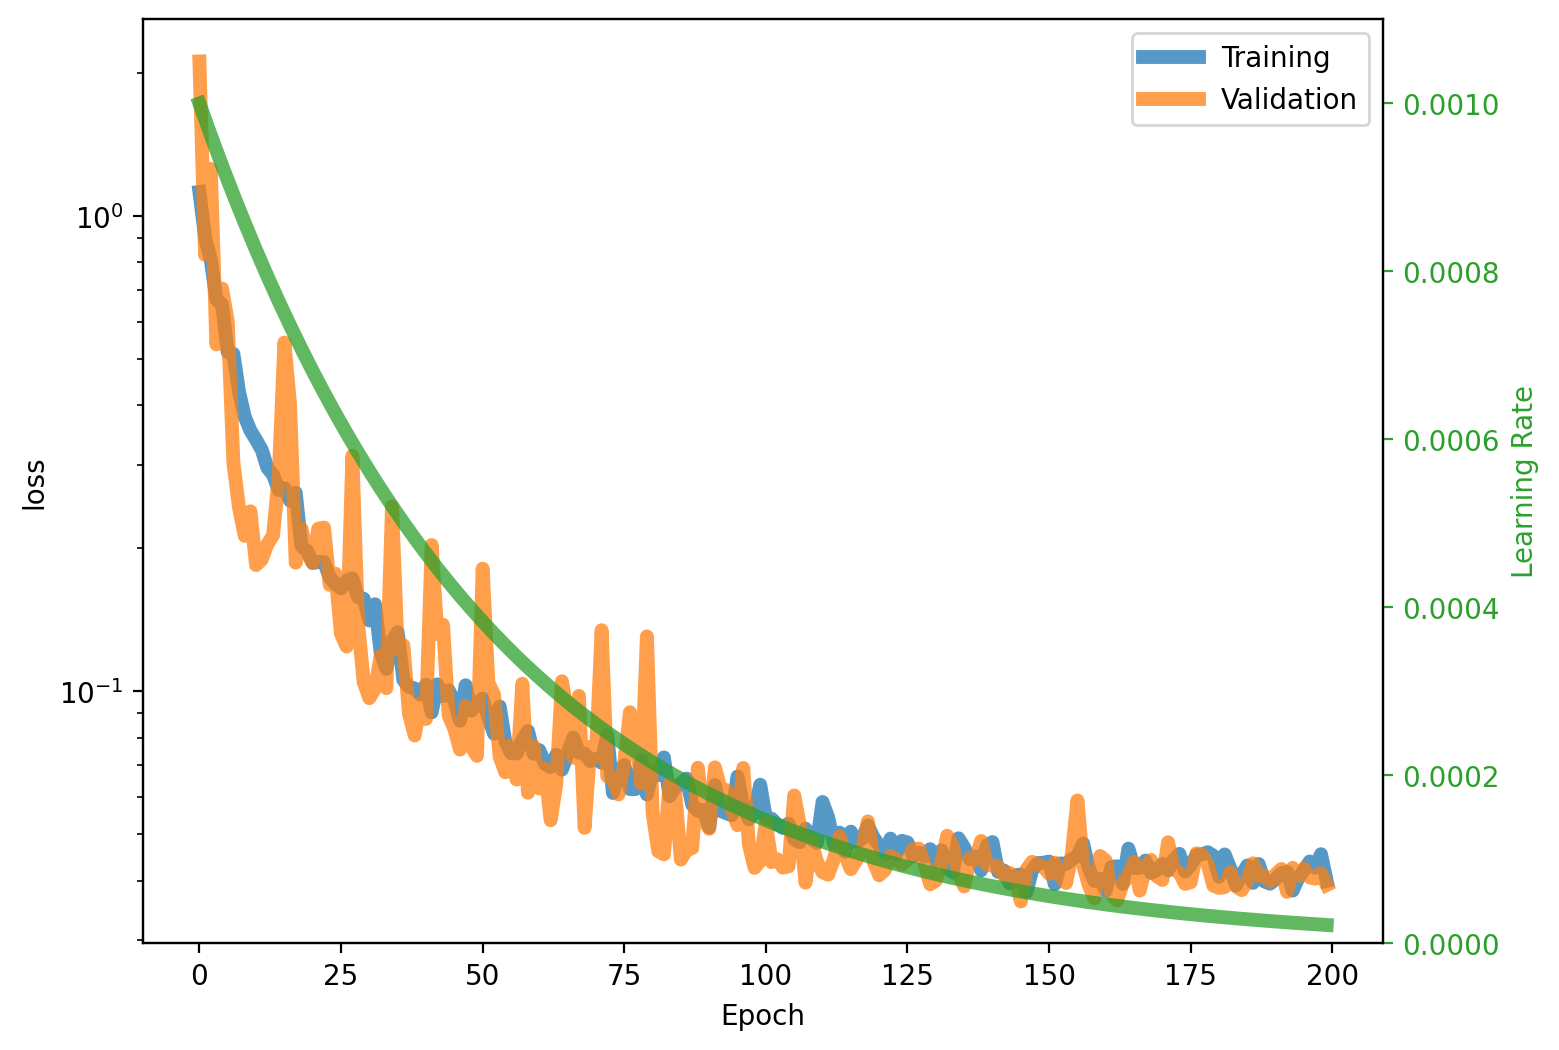

In [7]:
train.lossCurve()

## ParityPlot

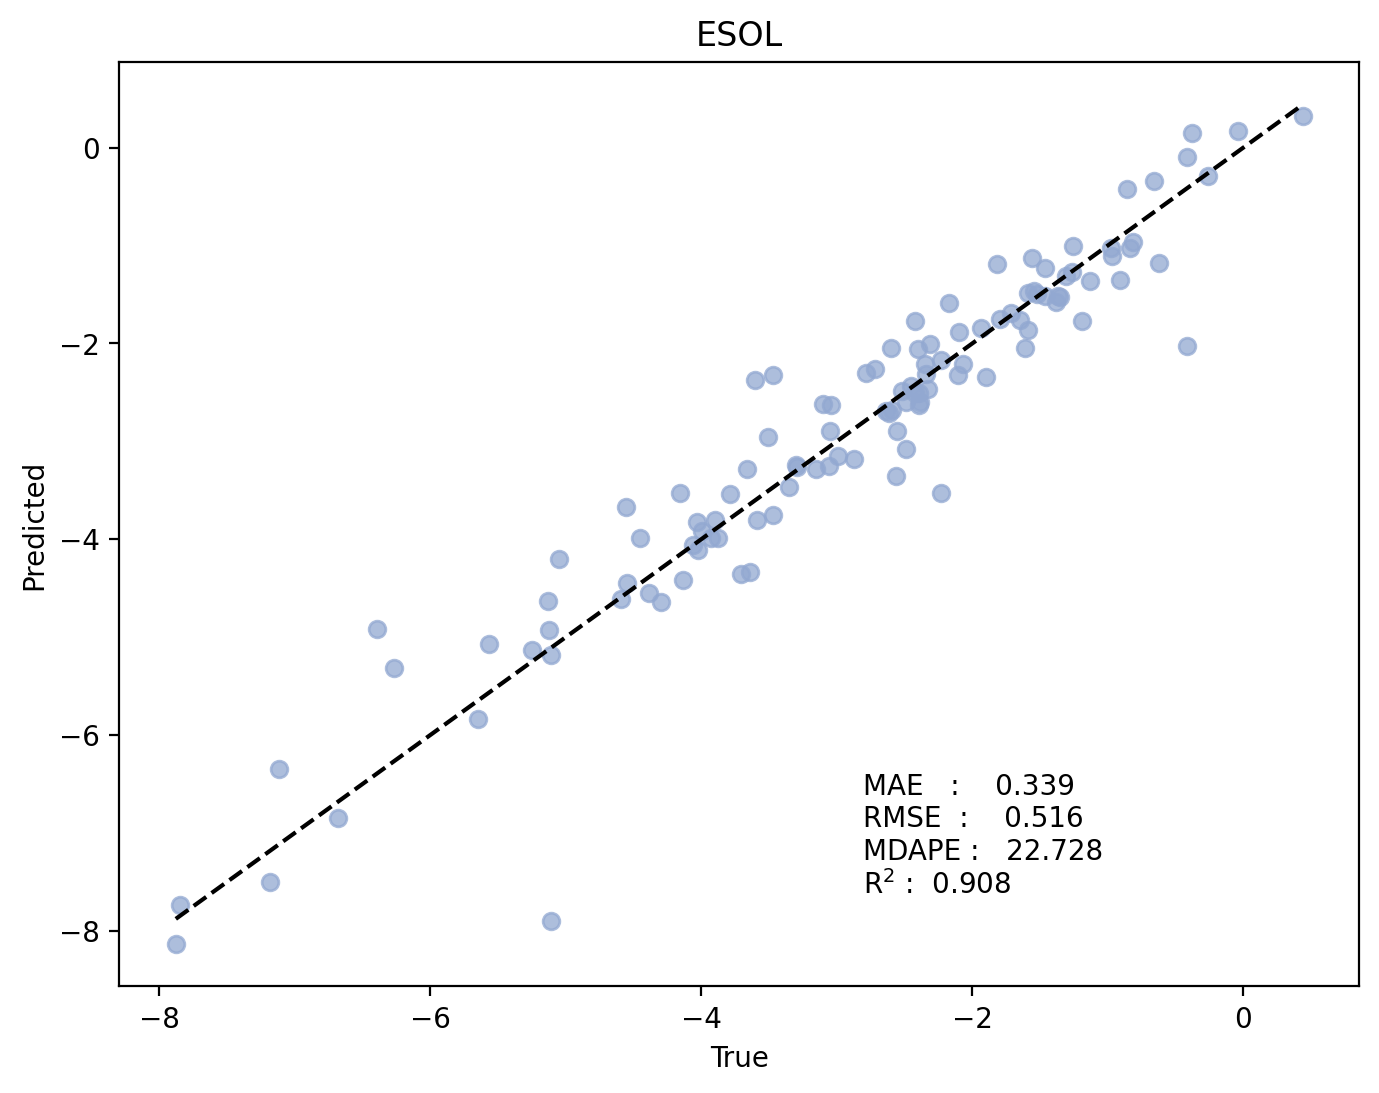

In [8]:
train.TPPlot()

## Nice Plot

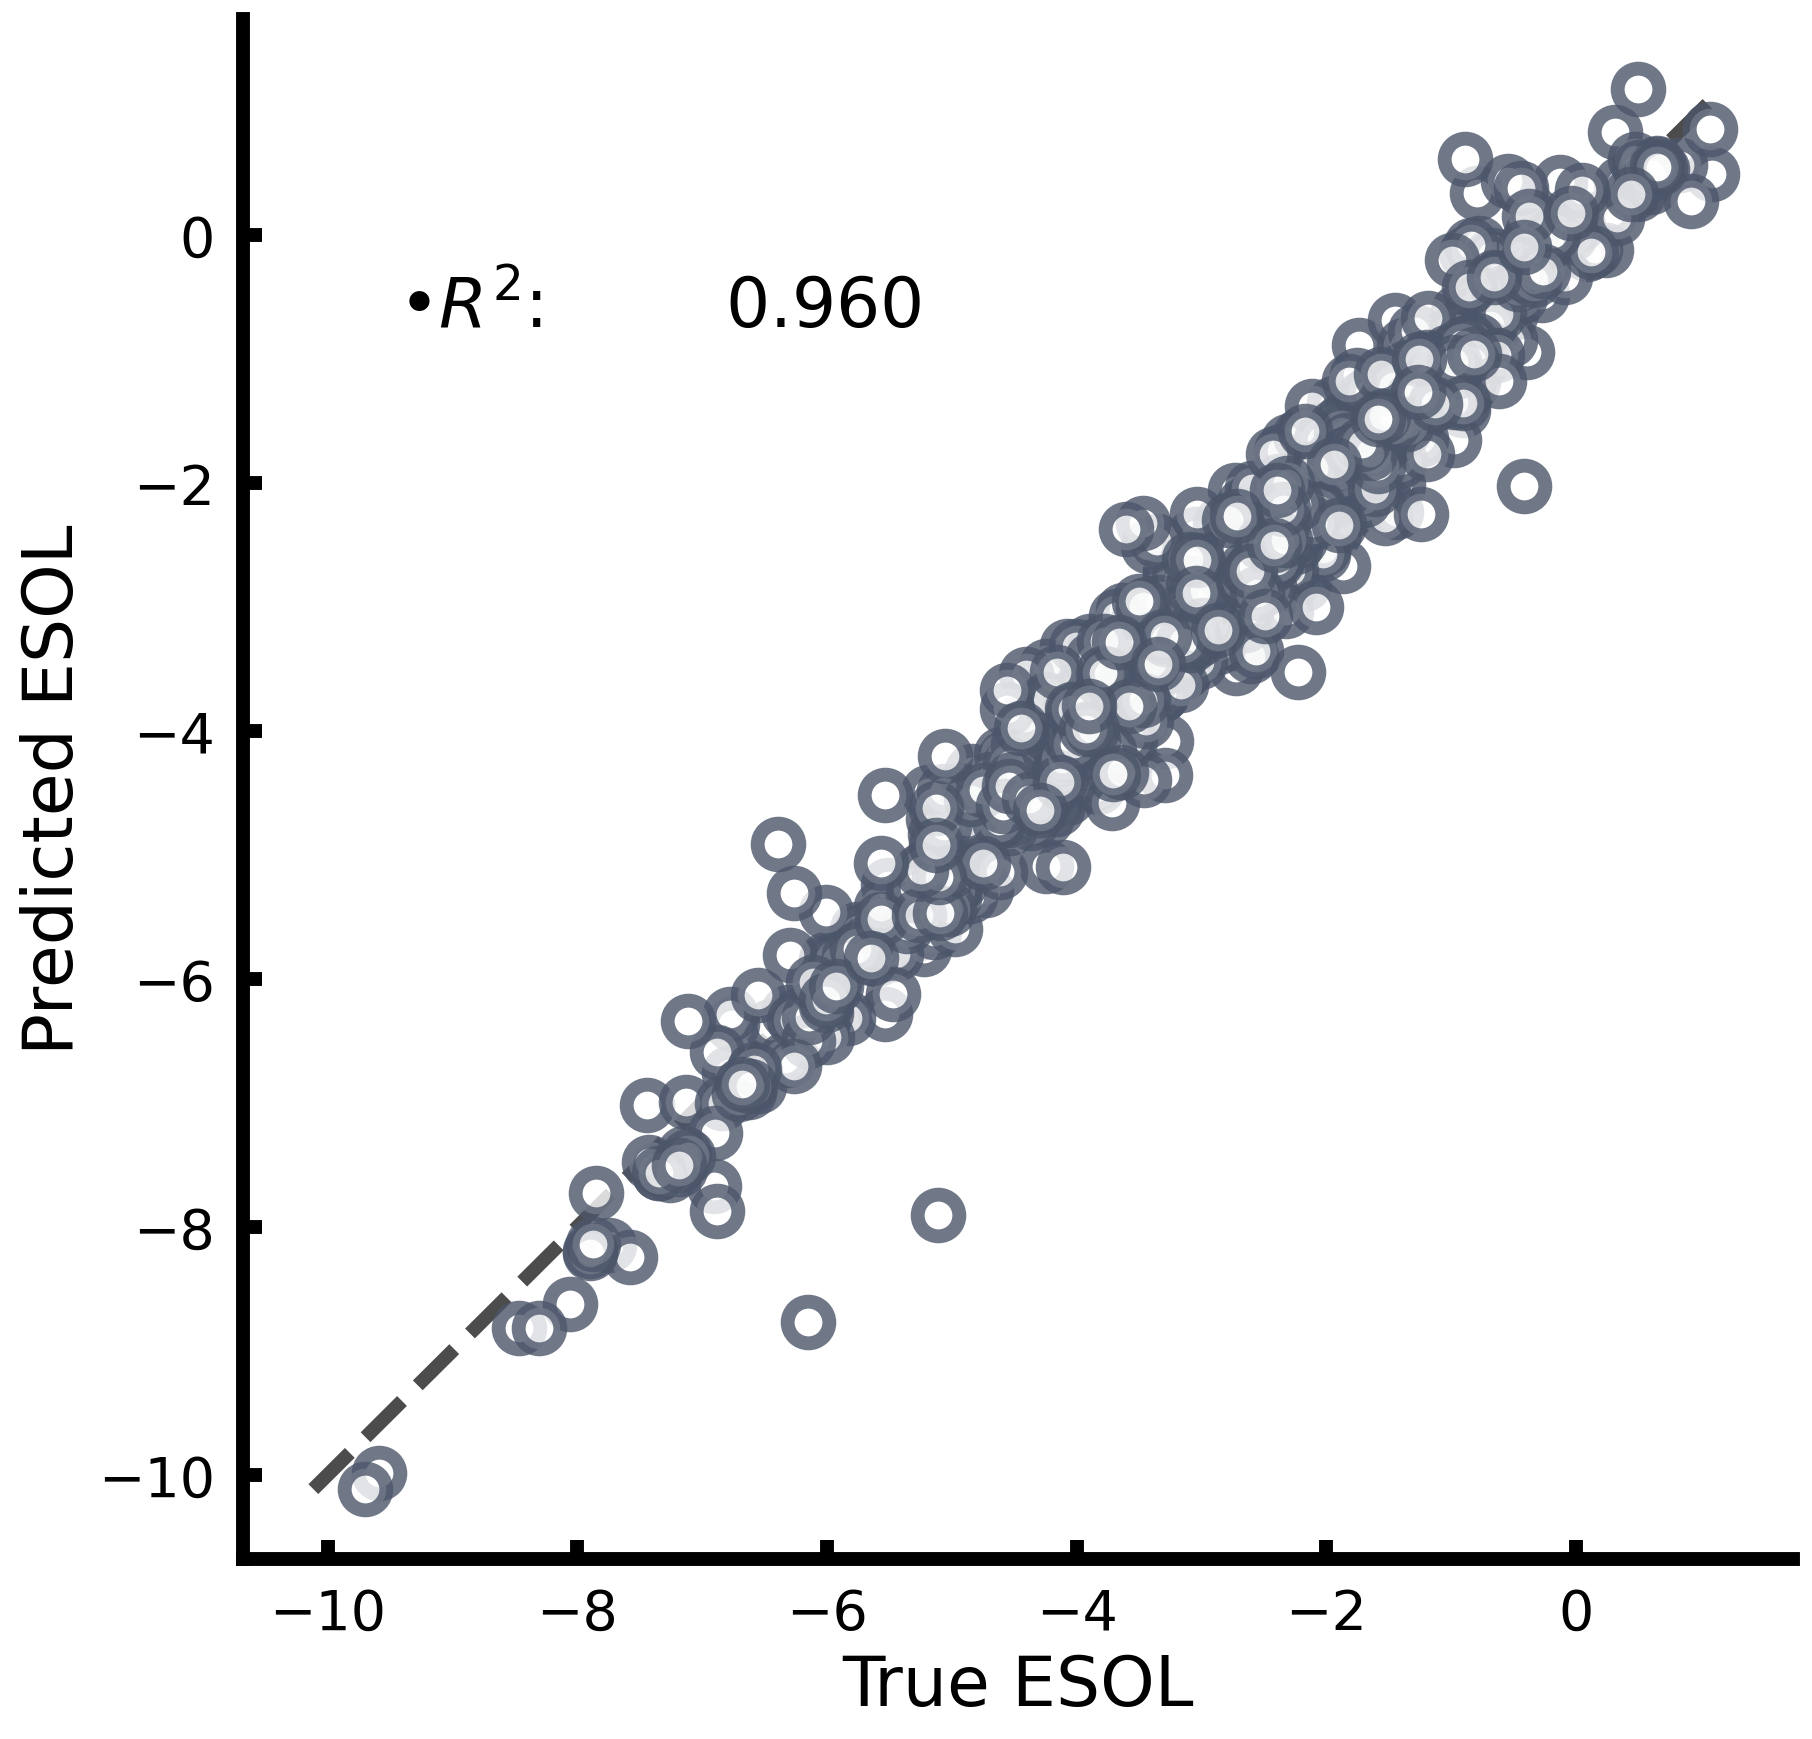

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 10), dpi = 200)
ax = plt.gca()

true, pred = train.eval(total = True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(5)
ax.spines['left'].set_linewidth(5)
ax.tick_params(labelsize = 20, direction = 'in', width = 5, length = 7, pad = 10)

combined = np.stack([true, pred]).flatten()

ax.plot([combined.min(), combined.max()], [combined.min(), combined.max()], color = 'k', linestyle = '--', linewidth = 5, alpha = 0.7)
ax.plot(true, pred, marker = 'o', markersize = 15, markerfacecolor = '#FFFFFF', markeredgecolor = '#4C566A', markeredgewidth = 5, linestyle = 'None', alpha = 0.8)
# ax.plot(true, pred, marker = 'o', markersize = 15, markerfacecolor = '#FFFFFF', markeredgecolor = '#BF616A', markeredgewidth = 5, linestyle = 'None', alpha = 0.8)

annot = "•$R^2$: %12.3f" % train.metrics(true, pred)[-1]
# annot = "•MAE: %8.3f\n•RMSE: %6.3f\n•MAPE: %7.3f%%\n•$R^2$: %12.3f" % train.metrics(true, pred)
ax.annotate(annot, xy = (0.1, 0.8), xycoords = 'axes fraction', fontsize = 25)

# ax.set_xlabel("True Flash Point (K)", fontsize = 25)
# ax.set_ylabel("Predicted Flash Point (K)", fontsize = 25)
ax.set_xlabel("True ESOL", fontsize = 25)
ax.set_ylabel("Predicted ESOL", fontsize = 25)

plt.show()